## Data전처리 작업 진행

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

import missingno as msno

plt.style.use('seaborn')
sns.set(font_scale = 1.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# matplotlib에서 한글 사용하기 위함.
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기
social = pd.read_csv('./0. Data/사회통합실태조사_2019년.csv', encoding = 'euc-kr')

In [4]:
# 데이터 확인
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 275 entries, 데이터 ID to 학력b6
dtypes: float64(28), int64(247)
memory usage: 16.8 MB


In [5]:
social.iloc[:, :100].info() # 칼럼 100까지

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 100 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   데이터 ID                                  8000 non-null   int64  
 1   모수추정 가중치                                8000 non-null   float64
 2   표준화 가중치                                 8000 non-null   float64
 3   어제의 주관적 정서 경험-행복감                       8000 non-null   int64  
 4   어제의 주관적 정서 경험-걱정(근심)                    8000 non-null   int64  
 5   어제의 주관적 정서 경험-우울감                       8000 non-null   int64  
 6   삶에 대한 만족도                               8000 non-null   int64  
 7   본인이 하는 일이 가치 있다고 생각하는 정도                8000 non-null   int64  
 8   우리 사회의 안전성에 대한 인식                       8000 non-null   int64  
 9   살고 있는 동네(시 군 구)의 안전성에 대한 인식             8000 non-null   int64  
 10  살고 있는 동네(읍 면 동)의 안전성에 대한 인식             8000 non-null   int

In [6]:
social.iloc[:, 100:200].info() # 지난 1년간 ~ 에서 "만족도"의 경우는 사용한 사람(1로 응답)한 사람에 대해서만 조사하였으므로, null이 존재함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 100 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   기관별 신뢰 정도-검찰                           8000 non-null   int64  
 1   기관별 신뢰 정도-경찰                           8000 non-null   int64  
 2   기관별 신뢰 정도-지방자치단체                       8000 non-null   int64  
 3   기관별 신뢰 정도-공기업                          8000 non-null   int64  
 4   기관별 신뢰 정도-군대                           8000 non-null   int64  
 5   기관별 신뢰 정도-노동조합단체                       8000 non-null   int64  
 6   기관별 신뢰 정도-시민단체                         8000 non-null   int64  
 7   기관별 신뢰 정도-TV방송사                        8000 non-null   int64  
 8   기관별 신뢰 정도-신문사                          8000 non-null   int64  
 9   기관별 신뢰 정도-교육기관                         8000 non-null   int64  
 10  기관별 신뢰 정도-의료기관                         8000 non-null   int64  
 11  기관별

In [7]:
social.iloc[:, 200:].info() # 본인 및 부모님의 학력-졸업/수료 여부의 null값은 정규교육 과정에서 '0. 안받았음'을 선택했으면 비어있기 때문에 존재함.
# 직업부분이 비는데 좀 더확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 75 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   자녀의 배우자로서 집단 구성원별 포용 정도-동성애자                   8000 non-null   int64  
 1   자녀의 배우자로서 집단 구성원별 포용 정도-북한이탈주민                 8000 non-null   int64  
 2   사회갈등의 원인 (1순위)                                 8000 non-null   int64  
 3   사회갈등의 원인 (2순위)                                 8000 non-null   int64  
 4   우리 사회 갈등 정도-빈곤층과 중 상층                          8000 non-null   int64  
 5   우리 사회 갈등 정도-보수와 진보                             8000 non-null   int64  
 6   우리 사회 갈등 정도-근로자와 고용주                           8000 non-null   int64  
 7   우리 사회 갈등 정도-수도권과 지방                            8000 non-null   int64  
 8   우리 사회 갈등 정도-개발과 환경보존                           8000 non-null   int64  
 9   우리 사회 갈등 정도-노인층과 젊은층                           8000 

## 직업부분의 null 값이 비는 것에 대한 패턴 분석

In [8]:
temp = social.loc[:, '지난 일주일간 일자리 유무' : '직장 유형']

In [9]:
temp.head()

,지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,1,4.0,NaN,3.0,NaN,5.0
1,1,4.0,NaN,1.0,1.0,3.0
2,2,NaN,4.0,NaN,NaN,NaN
3,1,7.0,NaN,1.0,1.0,5.0
4,2,NaN,14.0,NaN,NaN,NaN


In [10]:
import math

In [11]:
math.isnan(temp.loc[2, '직업'])

True

In [12]:
whatdid_oneweek = list()
status = list()
contract_type = list()
worktype = list()
for job in range(np.shape(temp)[0]):
    if math.isnan(temp.loc[job, '직업']) == True:
       whatdid_oneweek.append(temp.loc[job, '지난 일주일간 일자리 없었을 시 한 일'])
       status.append(temp.loc[job, '직장에서의 지위'])
       contract_type.append(temp.loc[job, '상용/임시/일용 여부'])
       worktype.append(temp.loc[job, '직장 유형'])

In [13]:
import collections

In [14]:
# 추출한 데이터를 dictionary로 변환
whatdid_oneweek = collections.Counter(whatdid_oneweek)
status = collections.Counter(status)
contract_type = collections.Counter(contract_type)
worktype = collections.Counter(worktype)

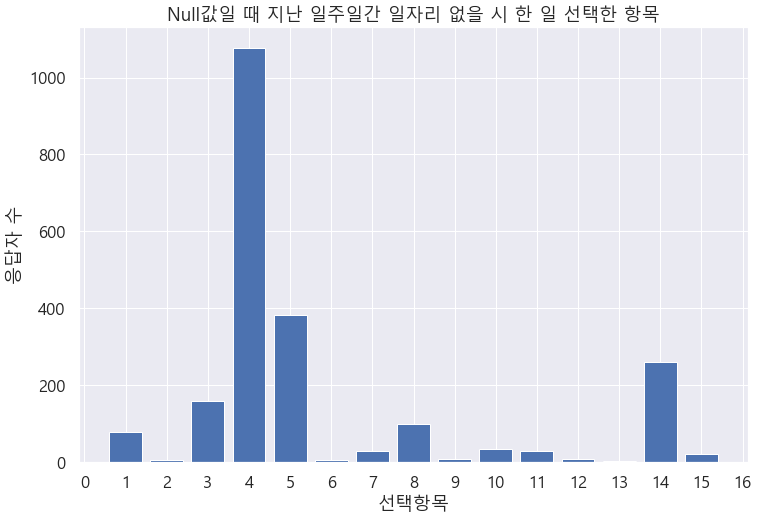

In [18]:
f, ax = plt.subplots(1, 1, figsize = (12,8))
plt.bar(*zip(*whatdid_oneweek.items()))
plt.xticks(np.arange(0, 17, 1))
plt.ylabel('응답자 수')
plt.xlabel('선택항목')
plt.title('Null값일 때 지난 일주일간 일자리 없을 시 한 일 선택한 항목')
plt.show()

# 4: 가사, 5: 정규기관통학, 14: 쉬었음, 3: 육아, 8: 취업준비 1: 구직활동 순으로 null값이 많음.
# 데이터를 살펴보니, 여기에 응답한 사람들은 그 뒷문항에 대해서 응답하지 아니하였음.

In [32]:
8000 - sum(whatdid_oneweek.values())

5811

In [ ]:
## 데이터가 비는 것을 전부다 변환 --> 99로 변환하기

In [61]:
social = social.replace(np.nan, 99)

## 데이터 기초분석 (2019년)

In [85]:
social__temp = social[['성별', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도', '우리 사회의 안전성에 대한 인식', '사회적 지위에 대한 인식', '타인의 의견 존중 중요도', '이념적 성향', '우리 사회 집단 간 소통 수준-가족 간', '우리 사회 집단 간 소통 수준-직장 구성원 간', '우리 사회 집단 간 소통 수준-이웃 간', '우리 사회 집단 간 소통 수준-세대 간', '평일 하루 접촉하는 사람 수-가족 또는 친척', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척(인터넷 종류)', '평일 하루 접촉하는 사람 수-가족 또는 친척 외', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외(인터넷 종류)', '갑자기 목돈이 필요할 경우 빌릴 수 있는 사람 수', '몸이 아플 때 도와줄 수 있는 사람 수', '우울할 때 사적으로 대화할 수 있는 사람 수', '외롭다고 느끼는 정도', '자살하고 싶은 생각이 드는 정도', '아무도 나를 잘 알지 못한다고 느끼는 정도', '일반적으로 사람들을 신뢰하는 정도', '집단별 신뢰 정도-가족', '집단별 신뢰 정도-이웃', '집단별 신뢰 정도-지인', '집단별 신뢰 정도-낯선 사람', '집단별 신뢰 정도-국내 거주 외국인', '기관별 신뢰 정도-중앙정부 부처', '기관별 신뢰 정도-국회', '기관별 신뢰 정도-법원', '기관별 신뢰 정도-검찰', '기관별 신뢰 정도-경찰', '기관별 신뢰 정도-지방자치단체', '기관별 신뢰 정도-공기업', '기관별 신뢰 정도-군대', '기관별 신뢰 정도-노동조합단체', '기관별 신뢰 정도-시민단체', '기관별 신뢰 정도-TV방송사', '기관별 신뢰 정도-신문사', '기관별 신뢰 정도-교육기관', '기관별 신뢰 정도-의료기관', '기관별 신뢰 정도-대기업', '기관별 신뢰 정도-종교기관', '기관별 신뢰 정도-금융기관']]  

In [86]:
temp = social.loc[:, '기관별 공정한 업무수행에 대한 인식-행정기관':'공정한 사회를 만들기 위한 방안-중산층 확대']

In [ ]:
social__temp = pd.concat([social__temp, temp], axis = 1)

In [88]:
temp = social.loc[:, '집단 구성원 포용 정도-장애인':'사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)']

In [90]:
social__temp = pd.concat([social__temp, temp], axis = 1)

In [93]:
temp = social.loc[:, '연령']

In [94]:
social__temp = pd.concat([temp, social__temp], axis = 1)

In [96]:
temp = social.loc[:, '혼인상태': '직장 유형']

In [97]:
social__temp = pd.concat([social__temp, temp], axis = 1)

In [98]:
social__temp.head()

,연령,성별,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,우리 사회의 안전성에 대한 인식,사회적 지위에 대한 인식,타인의 의견 존중 중요도,이념적 성향,우리 사회 집단 간 소통 수준-가족 간,우리 사회 집단 간 소통 수준-직장 구성원 간,...,학력_정규교육 과정(아버지),학력_졸업/수료 여부(아버지),학력_정규교육 과정(어머니),학력_졸업/수료 여부(어머니),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,5,2,4,5,4,3,5,1,2,2,...,2,1.0,1,1.0,1,4.0,99.0,3.0,99.0,5.0
1,3,1,4,3,5,5,4,3,1,1,...,3,1.0,2,1.0,1,4.0,99.0,1.0,1.0,3.0
2,2,2,6,5,3,5,5,4,3,3,...,3,1.0,3,1.0,2,99.0,4.0,99.0,99.0,99.0
3,3,1,7,6,5,6,7,3,4,3,...,1,1.0,1,1.0,1,7.0,99.0,1.0,1.0,5.0
4,3,2,6,6,6,6,5,3,4,3,...,1,1.0,1,1.0,2,99.0,14.0,99.0,99.0,99.0


In [7]:
## 분석의 대상을 파일로 저장
social__temp.to_csv('./0. Data/2019년_사회통합실태조사_cleaned.csv', encoding = 'euc-kr', index = False)

NameError: name 'social__temp' is not defined

### Cleaned 된 데이터로 분석

In [8]:
social_2019 = pd.read_csv('./0. Data/2019년_사회통합실태조사_cleaned.csv', encoding = 'euc-kr')

In [112]:
social_2019.iloc[:, :5].info

<bound method DataFrame.info of       연령  성별  삶에 대한 만족도  본인이 하는 일이 가치 있다고 생각하는 정도  우리 사회의 안전성에 대한 인식
0      5   2          4                         5                  4
1      3   1          4                         3                  5
2      2   2          6                         5                  3
3      3   1          7                         6                  5
4      3   2          6                         6                  6
...   ..  ..        ...                       ...                ...
7995   4   1          8                        10                  6
7996   2   2          7                         9                  7
7997   1   2          6                         9                  6
7998   1   1          6                         7                  7
7999   4   1          7                         6                  6

[8000 rows x 5 columns]>

In [113]:
social_2019.head()

,연령,성별,삶에 대한 만족도,본인이 하는 일이 가치 있다고 생각하는 정도,우리 사회의 안전성에 대한 인식,사회적 지위에 대한 인식,타인의 의견 존중 중요도,이념적 성향,우리 사회 집단 간 소통 수준-가족 간,우리 사회 집단 간 소통 수준-직장 구성원 간,...,학력_정규교육 과정(아버지),학력_졸업/수료 여부(아버지),학력_정규교육 과정(어머니),학력_졸업/수료 여부(어머니),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,5,2,4,5,4,3,5,1,2,2,...,2,1.0,1,1.0,1,4.0,99.0,3.0,99.0,5.0
1,3,1,4,3,5,5,4,3,1,1,...,3,1.0,2,1.0,1,4.0,99.0,1.0,1.0,3.0
2,2,2,6,5,3,5,5,4,3,3,...,3,1.0,3,1.0,2,99.0,4.0,99.0,99.0,99.0
3,3,1,7,6,5,6,7,3,4,3,...,1,1.0,1,1.0,1,7.0,99.0,1.0,1.0,5.0
4,3,2,6,6,6,6,5,3,4,3,...,1,1.0,1,1.0,2,99.0,14.0,99.0,99.0,99.0


In [ ]:
## 성별의 분포도 확인

In [245]:
temp = social_2019.loc[:, '성별']

In [125]:
temp = collections.Counter(temp)
temp

Counter({'남자': 4011, '여자': 3989})

In [122]:
# change int to string
temp['남자'] = temp.pop(1)
temp['여자'] = temp.pop(2)

In [123]:
temp

Counter({'남자': 4011, '여자': 3989})

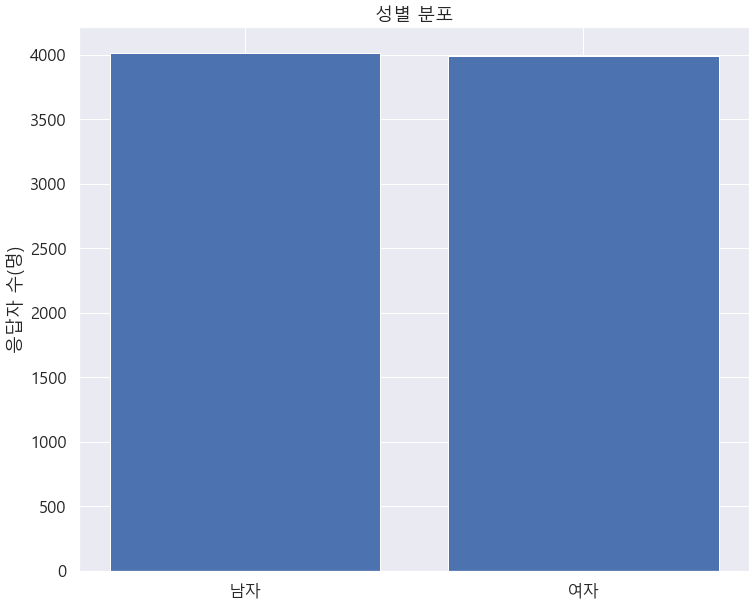

In [131]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
plt.bar(temp.keys(), temp.values())
plt.title('성별 분포')
plt.ylabel('응답자 수(명)')
plt.show()
## 거의 반반으로 조사하였음

## 성별에 따른 학력분포

In [136]:
social_2019.columns[:50]

Index(['연령', '성별', '삶에 대한 만족도', '본인이 하는 일이 가치 있다고 생각하는 정도',
       '우리 사회의 안전성에 대한 인식', '사회적 지위에 대한 인식', '타인의 의견 존중 중요도', '이념적 성향',
       '우리 사회 집단 간 소통 수준-가족 간', '우리 사회 집단 간 소통 수준-직장 구성원 간',
       '우리 사회 집단 간 소통 수준-이웃 간', '우리 사회 집단 간 소통 수준-세대 간',
       '평일 하루 접촉하는 사람 수-가족 또는 친척', '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척',
       '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척(인터넷 종류)', '평일 하루 접촉하는 사람 수-가족 또는 친척 외',
       '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외',
       '평일 하루 접촉하는 사람 접촉 방식-가족 또는 친척 외(인터넷 종류)', '갑자기 목돈이 필요할 경우 빌릴 수 있는 사람 수',
       '몸이 아플 때 도와줄 수 있는 사람 수', '우울할 때 사적으로 대화할 수 있는 사람 수', '외롭다고 느끼는 정도',
       '자살하고 싶은 생각이 드는 정도', '아무도 나를 잘 알지 못한다고 느끼는 정도', '일반적으로 사람들을 신뢰하는 정도',
       '집단별 신뢰 정도-가족', '집단별 신뢰 정도-이웃', '집단별 신뢰 정도-지인', '집단별 신뢰 정도-낯선 사람',
       '집단별 신뢰 정도-국내 거주 외국인', '기관별 신뢰 정도-중앙정부 부처', '기관별 신뢰 정도-국회',
       '기관별 신뢰 정도-법원', '기관별 신뢰 정도-검찰', '기관별 신뢰 정도-경찰', '기관별 신뢰 정도-지방자치단체',
       '기관별 신뢰 정도-공기업', '기관별 신뢰 정도-군대', '기관별 신뢰 정도-노동조합단체', '기관별 신뢰 정도-시민단체',
       '기관별 신뢰 정도-TV방송사', '기관별 신뢰 정도-신문

In [137]:
social_2019.columns[50:100]

Index(['기관별 공정한 업무수행에 대한 인식-검찰', '기관별 공정한 업무수행에 대한 인식-경찰',
       '기관별 공정한 업무수행에 대한 인식-중앙선거관리위원회', '우리 사회의 전반적 공정성에 대한 인식-교육 기회',
       '우리 사회의 전반적 공정성에 대한 인식-취업 기회', '우리 사회의 전반적 공정성에 대한 인식-과세 및 납세',
       '우리 사회의 전반적 공정성에 대한 인식-복지혜택', '우리 사회의 전반적 공정성에 대한 인식-지역균형발전',
       '우리 사회의 전반적 공정성에 대한 인식-법 집행', '우리 사회의 전반적 공정성에 대한 인식-정치 활동',
       '우리 사회의 전반적 공정성에 대한 인식-성별에 따른 대우', '우리 사회의 전반적 공정성에 대한 인식-언론 보도',
       '우리 사회의 전반적 공정성에 대한 인식-대기업 중소기업 간 관계',
       '우리 사회의 전반적 공정성에 대한 인식-경제 사회적인 분배구조', '우리 사회의 전반적 공정성에 대한 인식-병역 의무 이행',
       '공정한 사회를 만들기 위한 방안-공공정보 공개', '공정한 사회를 만들기 위한 방안-국민 참여 확대',
       '공정한 사회를 만들기 위한 방안-행정절차 강화', '공정한 사회를 만들기 위한 방안-공직청렴도 강화',
       '공정한 사회를 만들기 위한 방안-고등교육 기회 확대', '공정한 사회를 만들기 위한 방안-취업기회 보장',
       '공정한 사회를 만들기 위한 방안-사회복지서비스 확대', '공정한 사회를 만들기 위한 방안-기득권 양보',
       '공정한 사회를 만들기 위한 방안-상류층의 솔선수범', '공정한 사회를 만들기 위한 방안-중산층 확대',
       '집단 구성원 포용 정도-장애인', '집단 구성원 포용 정도-결손 가정의 자녀',
       '집단 구성원 포용 정도-외국인 이민자 노동자', '집단 구성원 포용 정도-전과자', '집단 구성원 포용 정도-동성애자',
  

In [139]:
social_2019.columns[100:]

Index(['우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-기업',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-노동조합단체',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-법조계',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-시민단체',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-언론',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-정부',
       '우리 사회의 갈등 해소를 위한 집단별 노력정도에 대한 인식-종교단체',
       '사회통합을 위해 중심적 역할을 해야 할 집단 (1순위)', '사회통합을 위해 중심적 역할을 해야 할 집단 (2순위)',
       '혼인상태', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '학력_정규교육 과정(아버지)',
       '학력_졸업/수료 여부(아버지)', '학력_정규교육 과정(어머니)', '학력_졸업/수료 여부(어머니)',
       '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위',
       '상용/임시/일용 여부', '직장 유형'],
      dtype='object')

In [257]:
temp = social_2019[['성별', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)']]

In [141]:
temp.head()

,성별,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인)
0,2,3,1.0
1,1,4,1.0
2,2,3,1.0
3,1,3,1.0
4,2,3,1.0


In [158]:
temp_1 = temp.loc[temp['성별'] == 1].reset_index(drop = True)
temp_2 = temp.loc[temp['성별'] == 2].reset_index(drop = True)

In [159]:
## 남자부터 분석
temp_1__education = collections.Counter(temp_1['학력_정규교육 과정(본인)'])
temp_1__education

Counter({4: 863, 3: 1224, 2: 178, 5: 1558, 1: 80, 7: 18, 0: 6, 6: 84})

In [160]:
# labeling
temp_1__education['대학(교)(4년제 미만)'] = temp_1__education.pop(4)
temp_1__education['고등학교'] = temp_1__education.pop(3)
temp_1__education['중학교'] = temp_1__education.pop(2)
temp_1__education['대학교(4년제 이상)'] = temp_1__education.pop(5)
temp_1__education['초등학교'] = temp_1__education.pop(1)
temp_1__education['대학원 박사 과정'] = temp_1__education.pop(7)
temp_1__education['안 받았음'] = temp_1__education.pop(0)
temp_1__education['대학원 석사 과정'] = temp_1__education.pop(6)

In [169]:
temp_1__education = dict(sorted(temp_1__education.items(), key = lambda item:item[1], reverse = True))
temp_1__education

{'대학교(4년제 이상)': 1558,
 '고등학교': 1224,
 '대학(교)(4년제 미만)': 863,
 '중학교': 178,
 '대학원 석사 과정': 84,
 '초등학교': 80,
 '대학원 박사 과정': 18,
 '안 받았음': 6}

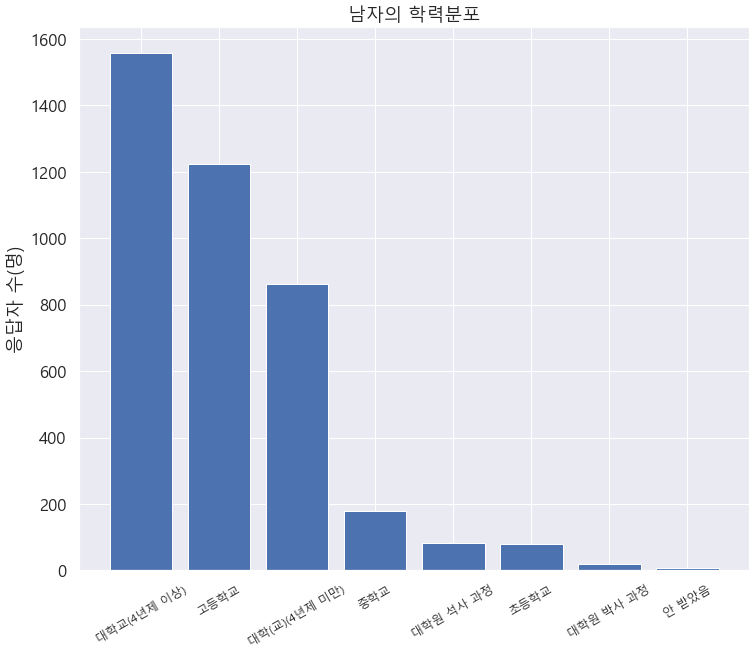

In [183]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
plt.bar(temp_1__education.keys(), temp_1__education.values())
plt.title('남자의 학력분포')
plt.ylabel('응답자 수(명)')
plt.xticks(rotation = 30, fontsize = 'large')
fig = plt.gcf()
fig.savefig('./1. 그림/남자의 학력분포.png', dpi = 150)
plt.show()

In [185]:
## 여자들의 학력도 확인
temp_2.head()

,성별,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인)
0,2,3,1.0
1,2,3,1.0
2,2,3,1.0
3,2,4,1.0
4,2,3,1.0


In [187]:
temp_2__education = collections.Counter(temp_2['학력_정규교육 과정(본인)'])
temp_2__education

Counter({3: 1444, 4: 874, 2: 285, 5: 1133, 1: 166, 6: 60, 7: 11, 0: 16})

In [188]:
# labeling
temp_2__education['대학(교)(4년제 미만)'] = temp_2__education.pop(4)
temp_2__education['고등학교'] = temp_2__education.pop(3)
temp_2__education['중학교'] = temp_2__education.pop(2)
temp_2__education['대학교(4년제 이상)'] = temp_2__education.pop(5)
temp_2__education['초등학교'] = temp_2__education.pop(1)
temp_2__education['대학원 박사 과정'] = temp_2__education.pop(7)
temp_2__education['안 받았음'] = temp_2__education.pop(0)
temp_2__education['대학원 석사 과정'] = temp_2__education.pop(6)

In [192]:
temp_2__education = dict(sorted(temp_2__education.items(), key = lambda item:item[1], reverse = True))

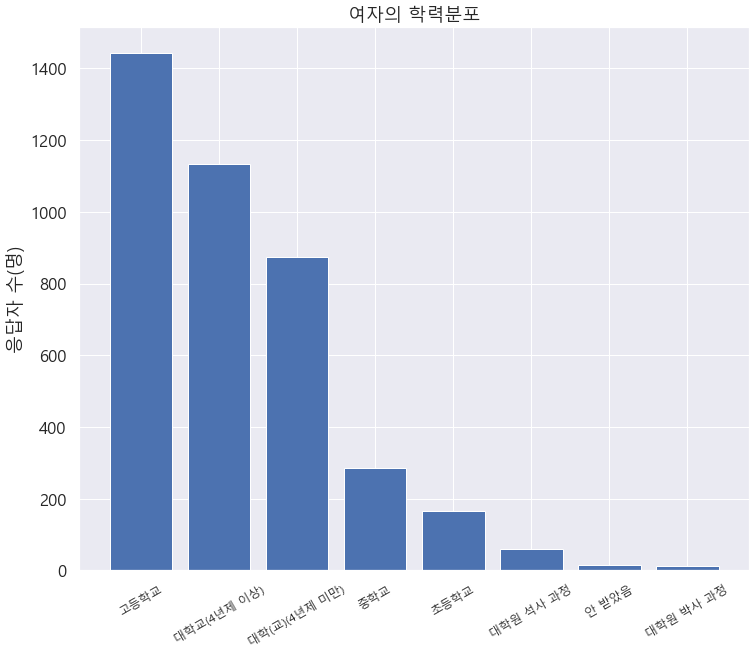

In [193]:
f, ax = plt.subplots(1, 1, figsize = (12, 10))
plt.bar(temp_2__education.keys(), temp_2__education.values())
plt.title('여자의 학력분포')
plt.ylabel('응답자 수(명)')
plt.xticks(rotation = 30, fontsize = 'large')
plt.show()

In [ ]:
# 남자랑 여자 동시에 비교

In [259]:
for i in range(np.shape(temp)[0]):
    if temp.loc[i, '학력_정규교육 과정(본인)'] == 0:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '안 받았음'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 1:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '초등학교'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 2:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '중학교'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 3:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '고등학교'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 4:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학(교)(4년제 미만)'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 5:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학교(4년제 이상)'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 6:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학원 석사 과정'
    elif temp.loc[i, '학력_정규교육 과정(본인)'] == 7:
        temp.loc[i, '학력_정규교육 과정(본인)'] = '대학원 박사 과정' 

In [262]:
for i in range(np.shape(temp)[0]):
    if temp.loc[i, '성별'] == 1:
        temp.loc[i, '성별'] = '남자'
    else:
        temp.loc[i, '성별'] = '여자' 

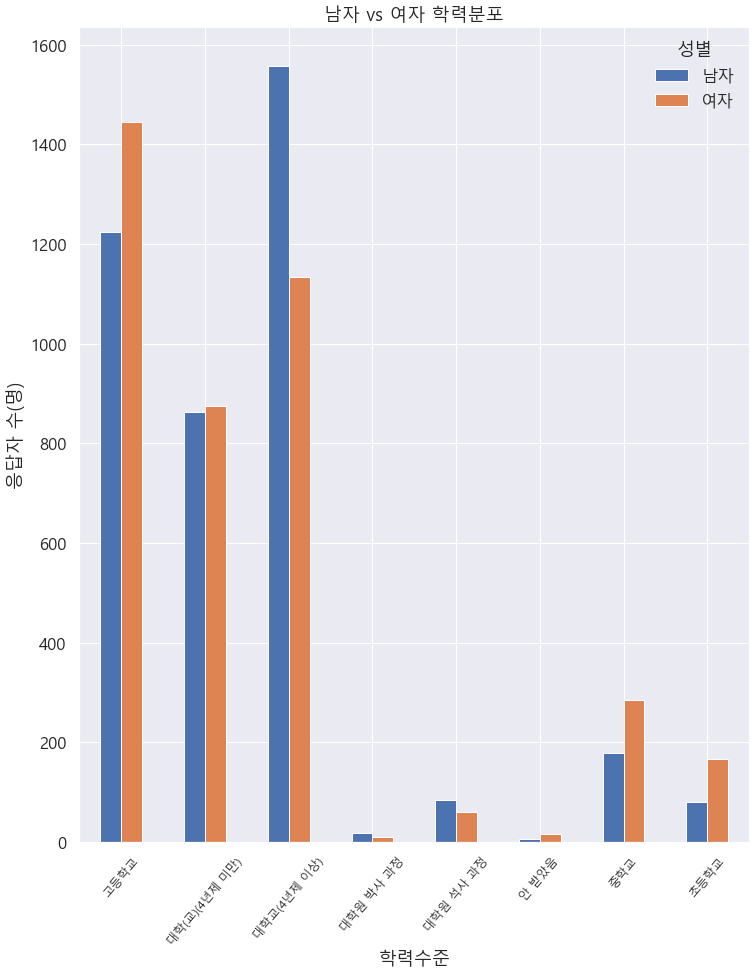

In [300]:
plot = temp.groupby(['학력_정규교육 과정(본인)', '성별']).size().unstack(level = 1).plot(kind = 'bar', figsize = (12, 15), title = '남자 vs 여자 학력분포')
plot.tick_params(
    axis = 'x',
    labelrotation = 50,
    labelsize = 'large'
    )
plot.set_xlabel('학력수준')
plot.set_ylabel('응답자 수(명)')
fig = plot.get_figure()
fig.savefig('./1. 그림/남자vs여자 학력분포.png', dpi = 150)

### 성별 직업 분포 확인

In [10]:
temp = social_2019[['성별', '학력_정규교육 과정(본인)', '학력_졸업/수료 여부(본인)', '지난 일주일간 일자리 유무', '직업', '지난 일주일간 일자리 없었을 시 한 일', '직장에서의 지위', '상용/임시/일용 여부', '직장 유형']]

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   성별                     8000 non-null   int64  
 1   학력_정규교육 과정(본인)         8000 non-null   int64  
 2   학력_졸업/수료 여부(본인)        8000 non-null   float64
 3   지난 일주일간 일자리 유무         8000 non-null   int64  
 4   직업                     8000 non-null   float64
 5   지난 일주일간 일자리 없었을 시 한 일  8000 non-null   float64
 6   직장에서의 지위               8000 non-null   float64
 7   상용/임시/일용 여부            8000 non-null   float64
 8   직장 유형                  8000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 562.6 KB


In [12]:
temp.head()

,성별,학력_정규교육 과정(본인),학력_졸업/수료 여부(본인),지난 일주일간 일자리 유무,직업,지난 일주일간 일자리 없었을 시 한 일,직장에서의 지위,상용/임시/일용 여부,직장 유형
0,2,3,1.0,1,4.0,99.0,3.0,99.0,5.0
1,1,4,1.0,1,4.0,99.0,1.0,1.0,3.0
2,2,3,1.0,2,99.0,4.0,99.0,99.0,99.0
3,1,3,1.0,1,7.0,99.0,1.0,1.0,5.0
4,2,3,1.0,2,99.0,14.0,99.0,99.0,99.0


In [14]:
temp = temp.astype(str) # string으로 변환

In [15]:
temp

str

## 성별 갈등문제 정도 확인 --> 파생해서 나갈 수 있는게 학력별로, 직업별로 어떻게 되어있는지 확인